# Assignment   
Requirement: According to the characteristics of the Y dataset, seperating the X dataset simply. After that,  using the method of clustering classifies the X dataset and explains it.


In [16]:
# import the necessary module

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stats
from numpy import linalg as LA
from numpy.linalg import inv
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors  
from sklearn.metrics import precision_recall_curve  
from sklearn.metrics import classification_report  
from sklearn.cross_validation import train_test_split 

In [2]:
# load the numpy dataset and simply replace NaN to zero in the original dataset

a = np.load("D:\BaiduYunDownload\quizzes.npz")
a1 = a['Y']
a2 = a['X']
ys = np.nan_to_num(a1)
xs = np.nan_to_num(a2)

In [3]:
# in this process, I seperate the Y dataset into two classes
# the method I did is that I choose the part of Y concentrated to mu as the first class and the remaining as the second class
# the reason is the frequency of Y dataset is highly closed to mu 
# seems like consistent to the normal distribution, but with high kurtosis
# Therefore, in order to find out what kind of the features of X dataset would give rise to the result of correspondant Y
# I'd like to observe the relationship of both of this two classes with its clustering result

mu = np.mean(ys)
sig = np.std(ys)
fuedg = mu + sig
fledg = mu - sig
n, = ys.shape

frnk = []
srnk = []
for i in range(n):
    if ys[i] >= fledg and ys[i] <= fuedg:
        frnk.append(i)
    else:
        srnk.append(i)
        
firy = ys[frnk]
firx = xs[frnk]
seny = ys[srnk]
senx = xs[srnk]

In [4]:
X_scaler = StandardScaler()
nfx = X_scaler.fit_transform(firx)
pcaf = PCA(n_components = 2).fit(nfx)

print (pcaf.explained_variance_ratio_)
print (pcaf.explained_variance_)
print (pcaf.n_components_)
newMat_2 = pcaf.fit_transform(nfx)
newMat_2

[ 0.5509073   0.11593326]
[ 115.69053202   24.34598526]
2


array([[  2.9324738 ,   2.50635817],
       [  2.21406305,  -0.73234692],
       [ -7.85988847,   4.57300738],
       ..., 
       [  0.83117371,  -1.4713799 ],
       [ 12.4083361 , -14.34802484],
       [ -3.13772301,  -4.53728837]])

In [13]:
X_scaler = StandardScaler()
nsx = X_scaler.fit_transform(senx)
pcas = PCA(n_components = 2).fit(nsx)

print (pcas.explained_variance_ratio_)
print (pcas.explained_variance_)
print (pcas.n_components_)
newMat_1 = pcas.fit_transform(nsx)
newMat_1

[ 0.53655741  0.14637096]
[ 112.67705588   30.73790168]
2


array([[ -5.16803098,  -1.49270691],
       [ -4.12402333,  -0.56349166],
       [ 10.24554542,  -1.23013542],
       ..., 
       [ -1.37160456,   1.65247105],
       [  3.1249776 ,  -0.1414707 ],
       [ -3.4366074 ,   2.28562028]])

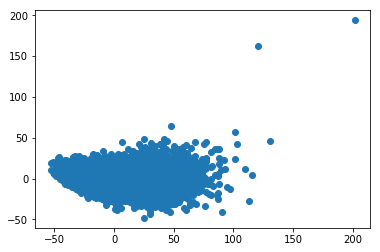

In [8]:
plt.scatter(newMat_2[:,0], newMat_2[:,1])
plt.show()

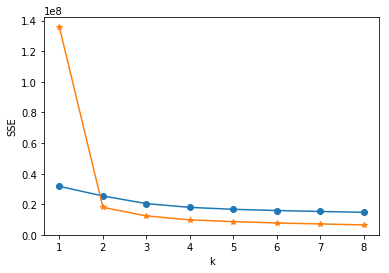

In [15]:
#firx.shape
#firy.shape
#senx.shape
#seny.shape

SSE = []
for k in range(1,9):
    estimator = KMeans(n_clusters = k)
    estimator.fit(firx)
    SSE.append(estimator.inertia_)

SSE1 = []
for k in range(1,9):
    estimator = KMeans(n_clusters = k)
    estimator.fit(senx)
    SSE1.append(estimator.inertia_)

X = range(1,9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.plot(X,SSE1,'*-')
plt.show()

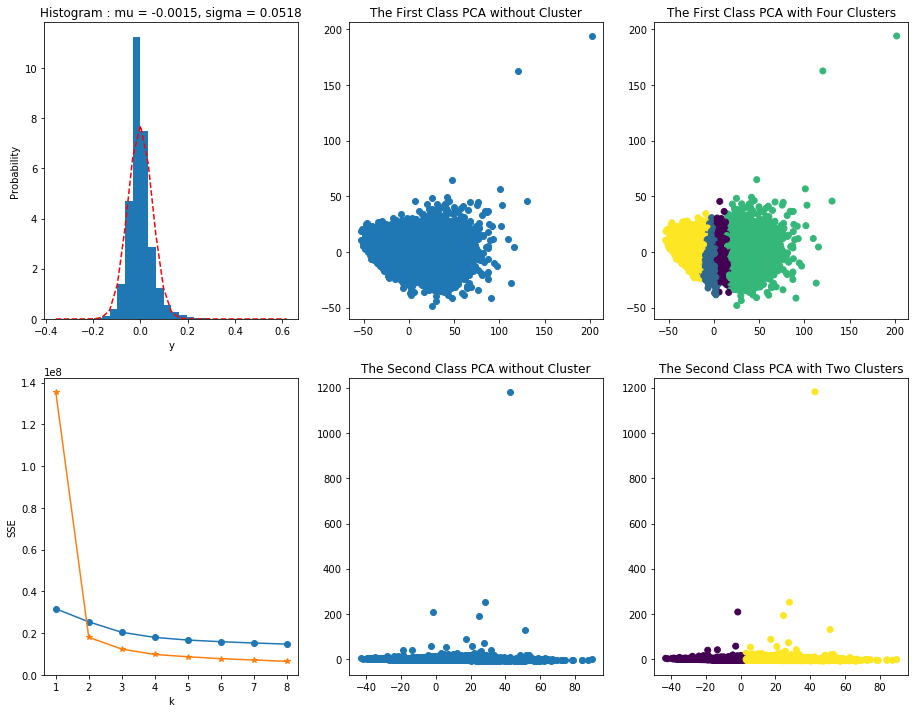

In [22]:
plt.figure(figsize=(16, 12))
#
plt.subplot(231)
mu = np.mean(ys)
sig = np.std(ys)
n, bins, patches = plt.hist(ys, 30, normed =1)
y = mlab.normpdf(bins, mu, sig)
plt.plot(bins, y, 'r--')
plt.xlabel('y')
plt.ylabel('Probability')
plt.title(r'Histogram : mu = -0.0015, sigma = 0.0518')
plt.subplots_adjust(left = 0.15)
#
plt.subplot(234)
X = range(1,9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.plot(X,SSE1,'*-')
#
plt.subplot(232)
plt.scatter(newMat_2[:,0], newMat_2[:,1])
plt.title("The First Class PCA without Cluster") 
#
y_pred = KMeans(n_clusters=4).fit_predict(newMat_2)
plt.subplot(233)  #
plt.scatter(newMat_2[:, 0], newMat_2[:, 1], c=y_pred) #
plt.title("The First Class PCA with Four Clusters")   #
#
plt.subplot(235)
plt.scatter(newMat_1[:,0], newMat_1[:,1])
plt.title("The Second Class PCA without Cluster") 
#
y_pred1 = KMeans(n_clusters=2).fit_predict(newMat_1)
plt.subplot(236)  #
plt.scatter(newMat_1[:, 0], newMat_1[:, 1], c=y_pred1) #
plt.title("The Second Class PCA with Two Clusters")

plt.show()

# 思考逻辑、做题方法
题目1：根据 Y 的特性，对 X 做简单的划分，然后在划分的数据集内部进行聚类  
题目2：对聚类结果进行可视化  
题目3：根据聚类结果得出有意义的结论  

---
1. 观察 Y 的特性，从 (1,1,1) 的图中发现该分布高度集中于均值，且概率分布类似于正态分布，但峰度极高。因此我对 X 的划分方法即是将 Y 分为两类，第一类是 Y 集中分布于均值 ± 0.5 个方差内的数据，如此一来就可以进一步观察是什么相对应的 X 特征造成 Y 的集中分布。
2. 为了达到对聚类结果进行可视化，考虑到 X 数据集的高维度特征，我通过主成分分析法将 X 数据集降维至 2 维平面，然后再对降维后的数据进行聚类。
3. 通过已知的数据以及基于我现在对算法的认知，在此我采用的聚类方法是 K- Means 聚类算法